TAREA

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime 

I.

In [5]:
index= pd.date_range(start='2023-01-01', periods=24 , freq='M')
index[0]

C:\Users\aml\AppData\Local\Temp\ipykernel_12760\2090504097.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index= pd.date_range(start='2023-01-01', periods=24 , freq='M')


Timestamp('2023-01-31 00:00:00')

II.

In [6]:
data= np.random.randint(100, 500, size=24)
print(data)

[160 303 289 342 363 435 186 449 262 125 461 269 408 391 438 196 370 390
 154 430 180 134 486 127]


In [7]:
df = pd.DataFrame(data, index=index, columns=['data'])

III. 

In [8]:
datetime_index = pd.date_range(start='2023-01-01', periods=24 , freq='M')
df_datetime = pd.DataFrame({'data' : np.random.randint(100, 500, size=24)}, index=datetime_index)
df_datetime

C:\Users\aml\AppData\Local\Temp\ipykernel_12760\650283395.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datetime_index = pd.date_range(start='2023-01-01', periods=24 , freq='M')


,data
2023-01-31,361
2023-02-28,214
2023-03-31,493
2023-04-30,113
2023-05-31,257
2023-06-30,362
2023-07-31,192
2023-08-31,322
2023-09-30,377
2023-10-31,153


IV.

In [9]:
df['lagged'] = df['data'].shift(periods=-1)
df['shifted'] = df['data'].shift(periods=1)

In [10]:
df['pct_change'] = df['data'].pct_change().mul(100)

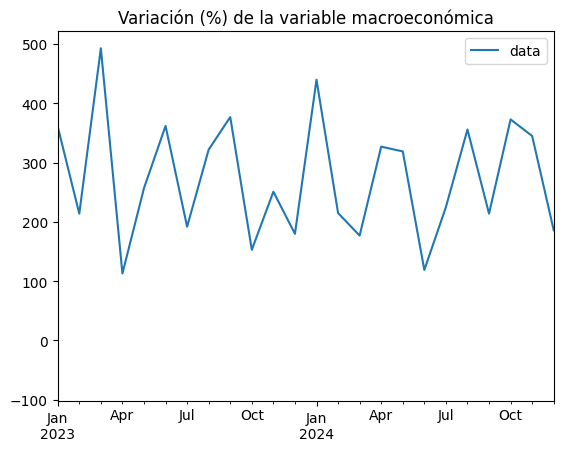

In [11]:
df_datetime.plot()
plt.plot(df.index, df['pct_change'], color='b')
plt.title('Variación (%) de la variable macroeconómica')
plt.show()

V.

In [16]:
df_quarterly = df.resample('Q').asfreq().fillna(method='bfill')

C:\Users\aml\AppData\Local\Temp\ipykernel_12760\766996787.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_quarterly = df.resample('Q').asfreq().fillna(method='bfill')
C:\Users\aml\AppData\Local\Temp\ipykernel_12760\766996787.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_quarterly = df.resample('Q').asfreq().fillna(method='bfill')


In [17]:
print("DataFrame Trimestral")
print(df_quarterly.head())

DataFrame Trimestral
            data  lagged  shifted  pct_change
2023-03-31   289   342.0    303.0   -4.620462
2023-06-30   435   186.0    363.0   19.834711
2023-09-30   262   125.0    449.0  -41.648107
2023-12-31   269   408.0    461.0  -41.648590
2024-03-31   438   196.0    391.0   12.020460


VI.

In [13]:
df_monthly_interpolated = df_quarterly.resample('M').interpolate(method='ffill')

C:\Users\aml\AppData\Local\Temp\ipykernel_12760\781997980.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly_interpolated = df_quarterly.resample('M').interpolate(method='ffill')
C:\Users\aml\AppData\Local\Temp\ipykernel_12760\781997980.py:1: FutureWarning: DataFrame.interpolate with method=ffill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_monthly_interpolated = df_quarterly.resample('M').interpolate(method='ffill')


In [18]:
print("DataFrame Mensual")
print(df_monthly_interpolated.head())

DataFrame Mensual
             data  lagged  shifted  pct_change
2023-03-31  289.0   342.0    303.0   -4.620462
2023-04-30  289.0   342.0    303.0   -4.620462
2023-05-31  289.0   342.0    303.0   -4.620462
2023-06-30  435.0   186.0    363.0   19.834711
2023-07-31  435.0   186.0    363.0   19.834711
